In [6]:
import pandas as pd
import numpy as np
import statistics
import sympy as sym
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# >>>>>>>>>>>>>>>>>>>>>>>>>>For Purchase Data<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


purchase_data = pd.read_excel('./data.xlsx', sheet_name="Purchase data")

dataFrame_purchase = pd.DataFrame(purchase_data)

dataFrame_purchase.drop(dataFrame_purchase.iloc[:, 5:23], axis=1, inplace=True)

print(dataFrame_purchase)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198


In [5]:
# 1.What is the dimensionality of the vector space for this data?
reshaping = dataFrame_purchase.iloc[0:10, 1:4]
# print(reshaping)
arrayMatrix = np.array(reshaping)
# print(arrayMatrix)



print("Dimensionality of the vector space for this data is",arrayMatrix.shape)

Dimensionality of the vector space for this data is (10, 3)


In [6]:
# 2.How many vectors exist in this vector space? (number of rows in the vector)

print("Number of rows/vectors are :",arrayMatrix.shape[0])

Number of rows/vectors are : 10


In [7]:
# 3.What is the rank of Matrix A?
print("The Rank of a Matrix :",np.linalg.matrix_rank(arrayMatrix))

The Rank of a Matrix : 3


In [11]:
# Using Pseudo-Inverse find the cost of each product available for sale. 
payment = dataFrame_purchase.iloc[0:10,4]

sudo_inverse = np.linalg.pinv(arrayMatrix)
# print(sudo_inverse)


# finding the cost of the each products available for sale

ct = dataFrame_purchase.iloc[0:10, 4]
ct_array = np.array(ct)
ct = ct_array.reshape(10,1)
print(ct)


ctX = np.dot(sudo_inverse, ct)
# print("Solution is ",ctX)

# A2.cost of the Products available for the vendor
print("Cost of a candy is", ctX[0])
print("Cost of a mango is", ctX[1])
print("Cost of a milk packet is", ctX[2])

[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Cost of a candy is [1.]
Cost of a mango is [55.]
Cost of a milk packet is [18.]


In [15]:
# A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others 
# as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on 
# purchase behavior.

# new_purchase = dataFrame_purchase
# myPurchase = []

# for row in dataFrame_purchase['Payment (Rs)']:
#     if row > 200:
#         myPurchase.append('RICH')
#     else:
#         myPurchase.append('POOR')
# new_purchase['Customer_Payment_Category'] = myPurchase
# X = new_purchase.iloc[:,1,4]
# Y = new_purchase
# print(new_purchase)
# print(new_purchase['accuracy'])

purchase_data['Category'] = purchase_data['Payment (Rs)'].apply(lambda x:'RICH' if x>200 else 'POOR')

X = purchase_data.iloc[:,1:4]
Y = purchase_data['Category']


X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=0)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

print(f'Accuracy:{classifier.score(X_test,Y_test)}')
prediction = classifier.predict([[5, 10, 55]]) #Predicting the result of a single observation
print(f"New customer is :{prediction[0]}")

Accuracy:1.0
New customer is :RICH


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [11]:
# >>>>>>>>>>>>>>IRCTC Stock Price<<<<<<<<<<<<<<<<<<<
import pandas as pd

# Reading the irctc_data
irctc_data = pd.read_excel("./data.xlsx", sheet_name="IRCTC Stock Price")

# Framing the irctc data
dataFrame_irctc = pd.DataFrame(irctc_data)

# Printing the first 5 rows of the data
print(dataFrame_irctc.head())
# Printing the Price section
price_D = dataFrame_irctc.iloc[0:256, 3]
price_Array = np.array(price_D)
print(price_Array)



           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg%  
0  0.0020  
1  0.0043  
2 -0.0020  
3 -0.0026  
4 -0.0023  
[2081.85 2077.75 2068.85 2072.95 2078.25 2083.   2076.85 2011.7  2050.4
 2089.95 2097.95 2064.4  2093.75 2106.35 2071.2  2144.85 2094.8  1921.7
 1921.8  1917.95 1894.6  1903.2  1896.25 1928.35 1894.05 1907.95 1884.5
 1862.   1855.65 1858.1  1835.05 1762.1  1747.65 1746.6  1792.3  1748.65
 1693.4  1725.2  1723.65 1770.2  1765.55 1791.4  1792.55 1795.85 1793.2
 1730.85 1712.   1673.05 1640.05 1612.7  1627.45 1608.1  1611.65 1582.
 1730.9  1726.4  1709.   1688.55 1702.65 1751

In [16]:
# Calculating the mean and variance of Price data of IRCTC.
irctc_mean = statistics.mean(irctc_data["Price"])
print("Mean of the Price data is :",irctc_mean)

irctc_variance = statistics.variance(irctc_data["Price"])
print("variance of the Price data is :",irctc_variance)

Mean of the Price data is : 1560.663453815261
variance of the Price data is : 58732.365352539186


In [20]:
# Select the price data for all Wednesdays and calculate the sample mean. Compare the mean 
# mean with the population mean and note your observations.

Wed_Data = irctc_data[irctc_data["Day"]=="Wed"]
Wed_Data_Mean = statistics.mean(Wed_Data["Price"])
print("Mean of Wednesday Price Data is :",Wed_Data_Mean)
print("After Comparing the mean we came to know that Sales at IRCTC is slightly less during wednesday compared to average")


Mean of Wednesday Price Data is : 1550.706
After Comparing the mean we came to know that Sales at IRCTC is slightly less during wednesday compared to average


In [22]:
#  Select the price data for the month of Apr and calculate the sample mean. Compare the 
# mean with the population mean and note your observations.

April_Data = irctc_data[irctc_data["Month"]=="Apr"]
April_Data_Mean = statistics.mean(April_Data["Price"])
print("The April Mean Price is: ", April_Data_Mean)

print("After Comparing the mean we came to know that Sales at IRCTC is slightly higher during April month compared to average")

The April Mean Price is:  1698.9526315789474
After Comparing the mean we came to know that Sales at IRCTC is slightly higher during April month compared to average


In [25]:
#  From the Chg% (available in column I) find the probability of making a loss over the stock. 
# (Suggestion: use lambda function to find negative values)

# iterrow is a builtin method in pandas which allowing us to iterate each row in the DataFrame. where as shape[0] gives the total number of rows.
total_neg = 0
for index,row in dataFrame_irctc.iterrows():
    if row['Chg%'] <0:
        total_neg+=1

print("Probability of making a loss over the stock is :", total_neg/dataFrame_irctc.shape[0])

Probability of making a loss over the stock is : 0.4979919678714859


In [26]:
# Calculate the probability of making a profit on Wednesday.
Total_Prof = 0
Total_Wed = 0

for index,row in dataFrame_irctc.iterrows():
    if row['Day']=="Wed":
        if row['Chg%']>0:
            Total_Prof+=1
        Total_Wed+=1

print("Probability of making a Profit on wednesday is :",Total_Prof/Total_Wed)       

Probability of making a Profit on wednesday is : 0.42


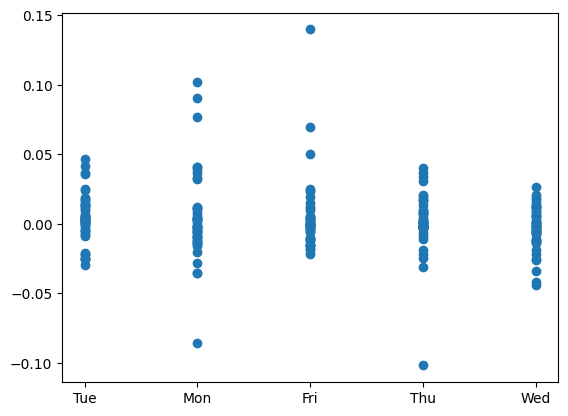

In [29]:
# Make a scatter plot of Chg% data against the day of the week

# A scatter plot is a diagram where each value in the data set is represented by a dot and to use it we need to install matplotlib and import matplotlib.pyplot as plt.

import matplotlib.pyplot as plt

Day_Data = []
Chg_data =[]

for index, row in dataFrame_irctc.iterrows():
    Day_Data.append(row['Day'])
    Chg_data.append(row['Chg%'])

plt.scatter(Day_Data, Chg_data)
plt.show()
